# Computing persistent Stiefel-Whitney classes of line bundles: demo

Raphaël Tinarrage, https://raphaeltinarrage.github.io/
<br/>
Nov 2020

This page describes the implementation and use of the method described in our paper *Computing persistent Stiefel-Whitney classes of line bundles* https://arxiv.org/abs/2005.12543.

## Background

The method described in this notebook has been designed to answer the following estimation problem: given a sample of a vector bundle, estimate the Stiefel-Whitney classes of the vector bundle.

Let $n,m > 0$, $\mathbb{R}^n$ be the Euclidean space of dimension $n$, $\mathcal{M}(\mathbb{R}^m)$ the space of $m \times m$ matrices, and $\mathcal{G}_1(\mathbb{R}^m)$ the Grassmannian of $1$-dimensional subspaces of $\mathbb{R}^m$, seen as a submanifold of $\mathcal{M}(\mathbb{R}^m)$. 
Note that $\mathcal{G}_1(\mathbb{R}^m)$ is also known as the projective space $\mathbb{P}(\mathbb{R}^m)$.
In practice, we will have $n=m$.

Let $\gamma > 0$ and endow the space $\mathbb{R}^n \times \mathcal{M}(\mathbb{R}^m)$ with the norm $\vert (x, A)\vert_\gamma = \sqrt{ \vert x \vert_2^2 + \gamma^2 \vert A \vert_\text{F}^2 }$, where $\vert \cdot \vert_2$ denotes the Euclidean norm on $\mathbb{R^n}$, and $\vert \cdot \vert_\text{F}$ the Frobenius norm on $\mathcal{M}(\mathbb{R}^m)$.

Consider a subset $ X \subset \mathbb{R}^n \times \mathcal{M}(\mathbb{R}^m)$.
The **Čech bundle filtration** of dimension $1$ on $X$ is the pair $(\mathbb{X}, p)$, where $\mathbb{X} = (X^t)_{t\geq 0}$ is the Čech filtration of $ X$ in the ambient Euclidean space $(\mathbb{R}^n \times \mathcal{M}(\mathbb{R}^m), \vert \cdot \vert_\gamma)$, and $p = (p^t\colon X^t \rightarrow \mathcal{G}_1(\mathbb{R}^m))_{t\geq 0}$ is the collection of maps $p^t \colon (x, A) \mapsto \pi(A)$, where $\pi(A)$ denotes the projection on the Grassmannian $\mathcal{G}_1(\mathbb{R}^m) \subset \mathcal{M}(\mathbb{R}^m)$.
It is defined on the index set $T = [0, t^\mathrm{max})$, where $t^\mathrm{max}$ is the distance from $X$ to the medial axis of $\mathcal{G}_1(\mathbb{R}^m)$.

The Čech bundle filtration allows to define the **persistent Stiefel-Whitney class** $w_1( X) = (w_1^t( X))_{t \in T}$. It is a collection of elements of the cohomology groups $H^1(X^t)$.
It is a persistent equivalent of the usual Stiefel-Whitney classes of vector bundles.

Given a persistent Stiefel-Whitney class, there exists a $t^\dagger \in T$ such that $w_1^t( X)$ is zero on $[0, t^\dagger)$, and nonzero on $(t^\dagger, t^\mathrm{max})$. We encode this piece of information in the **lifebar** of $w_1( X)$.
It reflects the orientability of $X$.

## Datasets

We consider here four datasets:
- the circle $\mathbb{S}_1 \subset \mathbb{R}^2$ with its tangent bundle
- the circle $\mathbb{S}_1 \subset \mathbb{R}^2$ with the Möbius bundle
- the embedded torus $T \subset \mathbb{R}^3$ with its normal bundle
- the immersed Klein bottle $K \subset \mathbb{R}^3$ with its normal bundle

## Package

The functions are contained in the `Velour` package (https://pypi.org/project/velour/).
<br/>
It is based on the `Gudhi` library (https://gudhi.inria.fr/python/latest/).

In [1]:
import velour

Note that, in order to ease the reading of this notebook, we shall not plot the whole persistence diagrams of our datasets, but instead select the bars greater than some value.

## First dataset: normal bundle of the circle

We first fix the parameter $\gamma$ as described in Background. The other parameters are $n=2$ and $m=2$.

In [2]:
gamma = 1

Then we generate a sample of the normal bundle of the torus, seen as a subset of $\mathbb{R}^2 \times \mathcal{M}(\mathbb{R}^2)$. 
$X$ is a $N\times(2+2^2)$ np.array.

In [3]:
N = 50                                                     #number of sampled points 
X = velour.SampleOnCircleNormalBundle(N = N, gamma=gamma)  #generates the dataset

In order to visualize $X$, which lives in dimension $6$, one can use a vector field representation, or project $X$ into lower dimensions.

The point cloud $X$ can be seen as a vector field as follows: if $x$ is a point of $X$, remember that $x = (y,A)$, where $y$ is a point of $\mathbb{R}^2$, and $A$ a matrix of $\mathcal{M}(\mathbb{R}^2)$ which represents the projection on a $1$-dimensional subspace of $\mathbb{R}^2$.
We then display the points $y$ with a segment on it, representing the direction of the corresponding $1$-dimensional subspace.

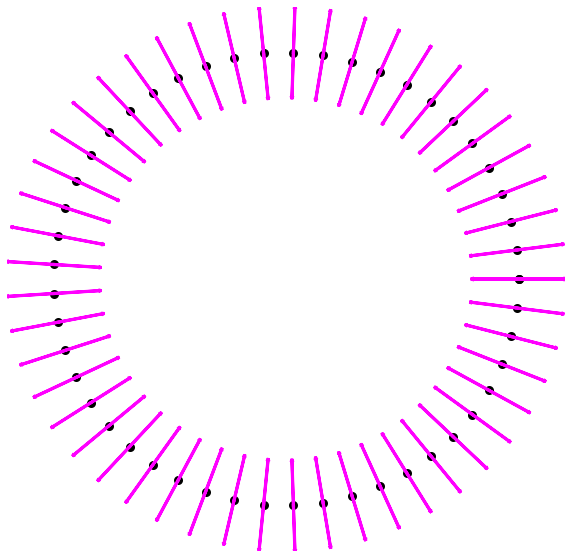

In [4]:
velour.PlotVectorField(X)   #vector field representation of X

One can also project $X \subset \mathbb{R}^6$ onto a $3$-dimensional subspace, for instance using Principal Component Analysis. 

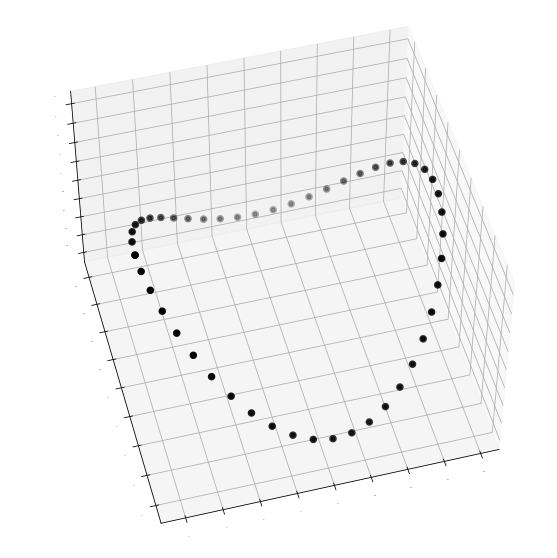

In [5]:
velour.PlotPCA(X)   #representation of X via PCA

At this point, we may visualize the influence of the parameter $\gamma$: the effect of $\gamma$ is to dilate the dataset $X \subset \mathbb{R}^2 \times \mathcal{M}(\mathbb{R}^2)$ in the $\mathcal{M}(\mathbb{R}^2)$-direction.
The more $\gamma$ is large, the more the $\mathcal{M}(\mathbb{R}^2)$-coordinate contributes to the distance between points. As one sees below, the points of $X$ with equal $\mathcal{M}(\mathbb{R}^2)$-coordinate, that is, antipodal points of the circle, appear closer.

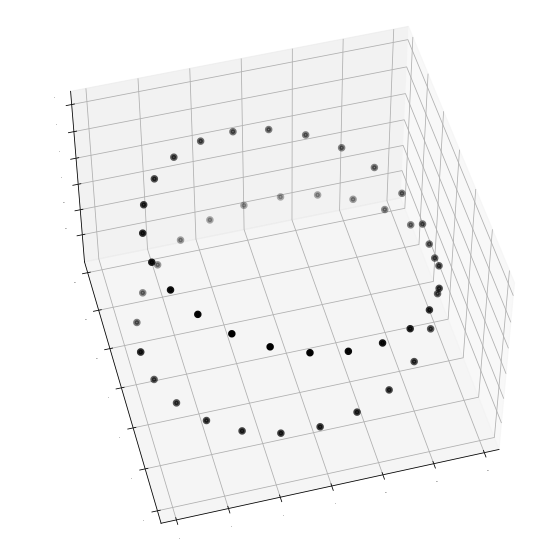

In [6]:
gamma2 = 2

Y = velour.SampleOnCircleNormalBundle(N = N, gamma=gamma2) #generates the dataset

velour.PlotPCA(Y)                                          #representation of Y via PCA

We now compute the persistence of $X$. We first use the Vietoris-Rips filtration.

Rips Complex is of dimension 4 - 2369935 simplices - 50 vertices. Filtration maximal value is 1.5.


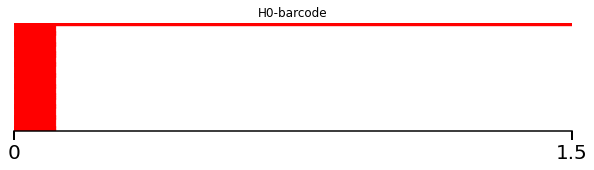

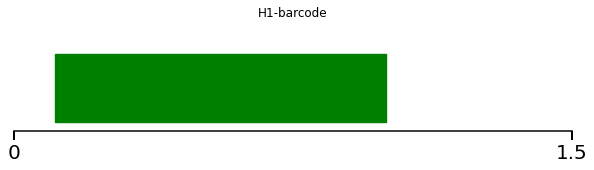

In [7]:
tmax = 1.5          #maximal filtration value for the Rips filtration and the persistence
dimension_max = 4   #maximal dimension to expand the Rips filtration

st = velour.RipsComplex(X, filtration_max = tmax, dimension_max = dimension_max)   #Rips filtration of X
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max-1, eps=0.05)         #persistence of Rips filtration

One observe two salient features: a red bar and a green bar. This corresponds to the homology of a circle, with Betti numbers $(\beta_0, \beta_1) = (1,1)$.

In comparison, we plot the persistence of the Delaunay filtration (alpha-complex). This filtration yields a persistence module which is isomorphic to the Čech filtration. 

Alpha-complex is of dimension 5 - 27247 simplices - 50 vertices.


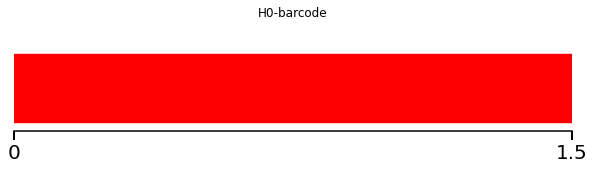

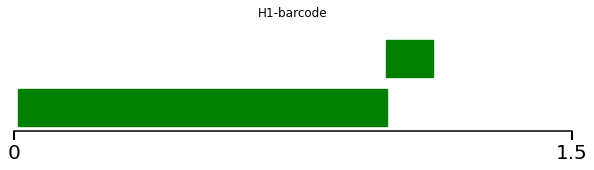

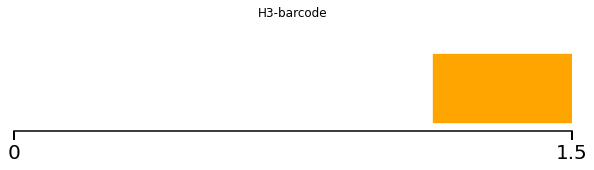

In [8]:
tmax = 1.5   #maximal filtration value for the persistence

st_alpha = velour.AlphaComplex(X)                                                  #Delaunay filtration over X
velour.PlotPersistenceBarcodes(st_alpha, tmax=tmax, d=dimension_max-1, eps=0.05)   #persistence of the Delaunauy filtration over X

One sees here a salient $H^3$-cohomology feature. It didn't appear in the Rips filtration.

We finally compute the lifebar of the persistent Stiefel-Whitney class for the Rips complex.
The lifebar is defined until $t^\text{max}$, the maximal filtration value of the correponding bundle filtration.
This maximal filtration value is given by `velour.BundleFiltrationMaximalValue()`.

In [9]:
filtration_max = velour.BundleFiltrationMaximalValue(X, filtration = 'Rips')

Filtration maximal value is 0.49999999999999983.


The map satisfies the weak star condition.
Mapping Cone Complex is of dimension 6 - 3580 simplices - 54 vertices.


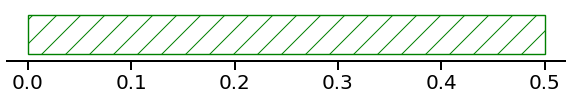

In [10]:
Lifebar = velour.ComputeLifebar(st, X, filtration_max=filtration_max)   #computes the lifebar

velour.PlotLifebar(Lifebar, filtration_max)                             #plots the lifebar

The lifebar is hatched, meaning that the Stiefel-Whitney class is zero all along the filtration. 
This is consistent with the actual Stiefel-Whitney class of the normal bundle of the circle, which is zero.

## Second dataset: Möbius bundle of the circle

Secondly, we consider a sample of the Mobius bundle of the torus, seen as a subset of $\mathbb{R}^2 \times \mathcal{M}(\mathbb{R}^2)$.
It is a non-orientable vector bundle, known as the universal bundle of the circle.
Our sample contains a little bit of noise.

In [11]:
gamma = 1

N = 30                                                         #number of sampled points 
X = velour.SampleOnCircleMobiusBundle(N = N, gamma=1, sd=0.1)  #generates the dataset

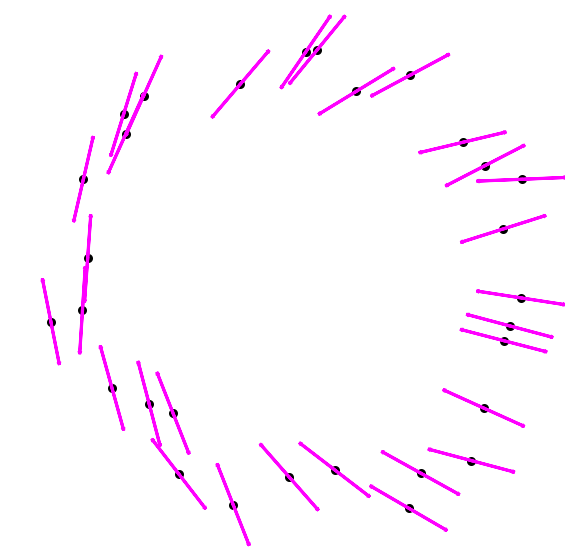

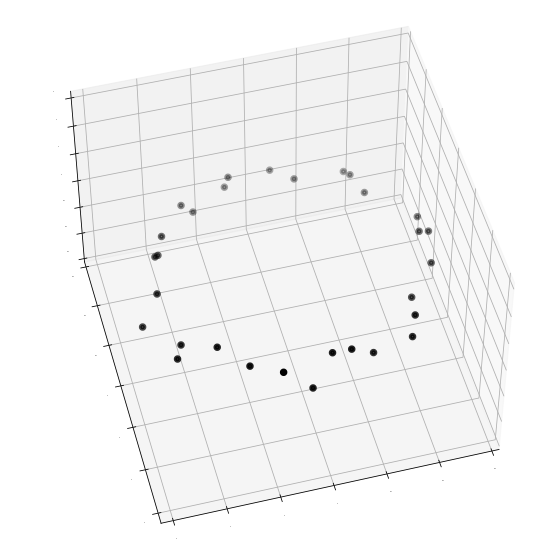

In [12]:
velour.PlotVectorField(X)   #vector field representation of X

velour.PlotPCA(X)           #representation of X via PCA

Even if the Möbius bundle of the circle is a subset of $\mathbb{R}^6$, one shows that it lies in a $2$-dimensional affine space, and that it is a circle. This can be visualized in the previous PCA representation.

We now compute the persistence of $X$. This time we will use the Delaunay filtration (alpha-complex), which yields the same persistence than the Čech filtration.

Alpha-complex is of dimension 6 - 2663 simplices - 30 vertices.


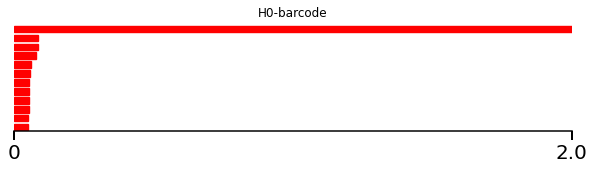

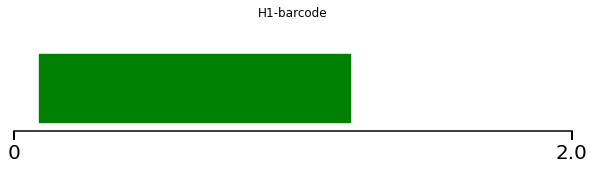

In [13]:
tmax = 2            #maximal filtration value for the Rips filtration and the persistence
dimension_max = 4   #maximal dimension to expand the Rips filtration

st = velour.AlphaComplex(X, filtration_max = tmax)                         #Delaunay filtration over X
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max, eps=0.05)   #persistence of Delaunay filtration 

On a large interval, we still read the homology of a circle.

We finally compute the lifebar of the persistent Stifel-Whitney class at time.
Remember that $t$ must be lower than the maximal filtration value of the corresponding Cech bundle filtration. 

In [14]:
filtration_max = velour.BundleFiltrationMaximalValue(X,filtration = 'Cech')

Filtration maximal value is 0.5864978697899049.


The map satisfies the weak star condition.
Mapping Cone Complex is of dimension 6 - 1399 simplices - 34 vertices.


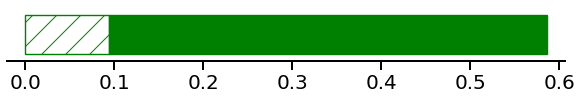

In [15]:
Lifebar = velour.ComputeLifebar(st, X, filtration_max=filtration_max)   #computes the lifebar

velour.PlotLifebar(Lifebar, filtration_max)                             #plots the lifebar

We read on the lifebar that the persistent Stiefel-Whitney class is nonzero on a large part of the filtration (where the bar is solid).
This is consistent with the non-orientability of the Möbius bundle of the circle (its Stiefel-Whitney class is nonzero).

## Third dataset: normal bundle of the torus

We consider a sample of the normal bundle of the torus, seen as a subset of $\mathbb{R}^3 \times \mathcal{M}(\mathbb{R}^3)$.
It is an orientable vector bundle.

In [16]:
gamma = 1

X, N_points = velour.SampleOnTorusNormalBundle(N = 100, min_dist = 0.7, gamma=gamma)   #generates the dataset

The sample contains 264 points.


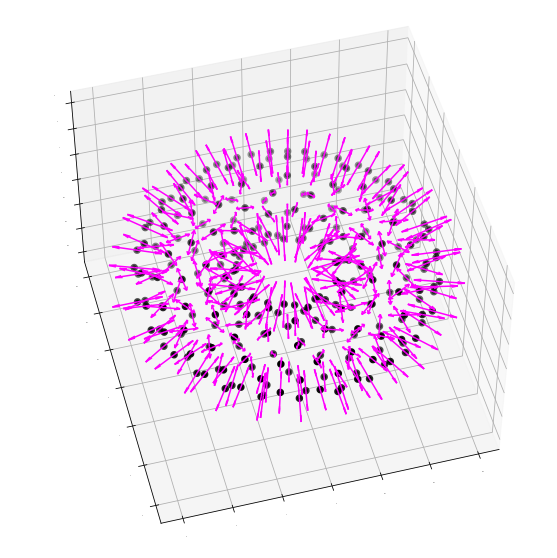

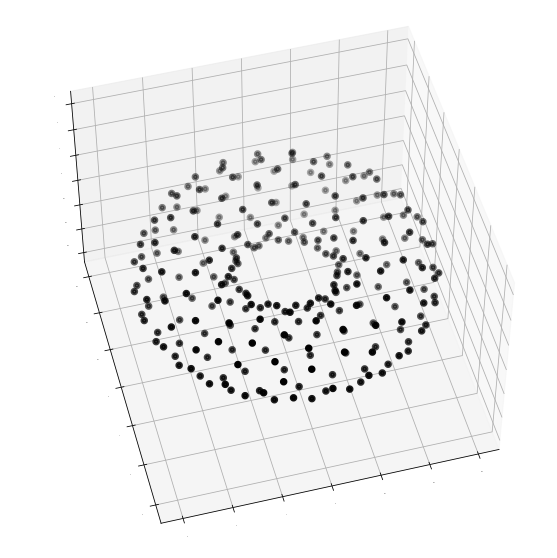

In [17]:
velour.PlotVectorField(X)   #vector field representation of X

velour.PlotPCA(X)           #representation of X via PCA

As before, the parameter $\gamma$ influences the geometry of the set.
As $\gamma$ grows, points with equal $\mathcal{M}(\mathbb{R}^3)$-coordinate tend to get closer.

The sample contains 721 points.


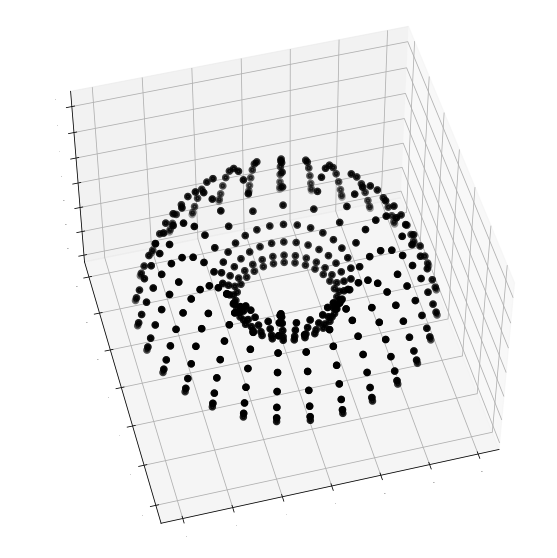

In [18]:
gamma2 = 2

X2, N_points2 = velour.SampleOnTorusNormalBundle(N = N, gamma=gamma2)   #generates the dataset

velour.PlotPCA(X2)   #representation of X2 via PCA

We now compute the persistence of $X$ for the Rips filtration.

Rips Complex is of dimension 3 - 74442 simplices - 264 vertices. Filtration maximal value is 1.


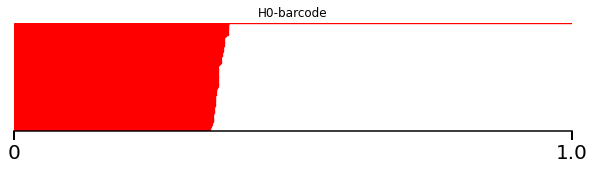

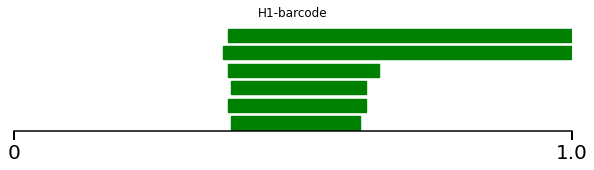

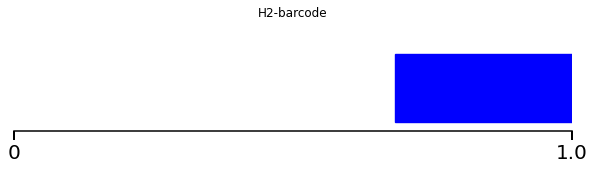

In [19]:
tmax = 1            #maximal filtration value for the Rips filtration and the persistence
dimension_max = 3   #maximal dimension to expand the Rips filtration

st = velour.RipsComplex(X, filtration_max = tmax, dimension_max = dimension_max)   #Rips filtration over X
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max, eps=0.2)            #persistence of the Rips filtration

We finally compute the persistent Stifel-Whitney class.
We first compute the maximal filtration value.

In [20]:
filtration_max = velour.BundleFiltrationMaximalValue(X, filtration = 'Rips')

Filtration maximal value is 0.49999999999999944.


In [21]:
velour.ComputeLifebar(st, X, filtration_max=filtration_max)   #diplays the lifebar

Impossible choice: the vertex 260 does not satisfies the weak star condition.
---> Subdivise again <---


False

The algorithm asks to subdivise the simplicial complex.
This is something that can happen in practice: the algorithm relies on the computation of a (weak) simplicial approximation, which exists only if the complex is refined enough.
To do so, we apply a barycentric subdivision via the function `velour.BarycentricSubdivisionSimplexTree`.

In [22]:
st_sub, X_sub = velour.BarycentricSubdivisionSimplexTree(st, X)

Subdivised Complex is of dimension 3 (previously 3) - 4113292 simplices (previously 74442) - 74442 vertices (previously 264).


Note that this new simplicial complex contains way more vertices than before. 

Now we can try to compute the lifebar again.

The map satisfies the weak star condition.
Mapping Cone Complex is of dimension 5 - 42540 simplices - 1398 vertices.


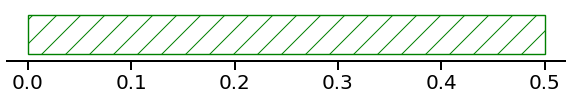

In [23]:
Lifebar = velour.ComputeLifebar(st_sub, X_sub, filtration_max=filtration_max)
velour.PlotLifebar(Lifebar, filtration_max)

# /!\ long computation time (5 minutes on my laptop)

The algorithm finished: one barycentric subdivision was enough.

We see that the persistent Stiefel-Whintey class is zero all along the filtration (hatched bar), which is consistent with the orientability of the normal bundle of the torus (zero Stiefel-Whitney class).

## Fourth dataset: normal bundle of the Klein bottle

We consider a sample of the normal bundle of the Klein embedded in $\mathbb{R}^3$. This normal bundle is seen as a subset of $\mathbb{R}^3 \times \mathcal{M}(\mathbb{R}^3)$.
It is an non-orientable vector bundle.

In [24]:
gamma = 1

X, N_points = velour.SampleOnKleinBottleNormalBundle(N = 100, min_dist = 0.55, gamma=1)  #generates the dataset

The sample contains 982 points.


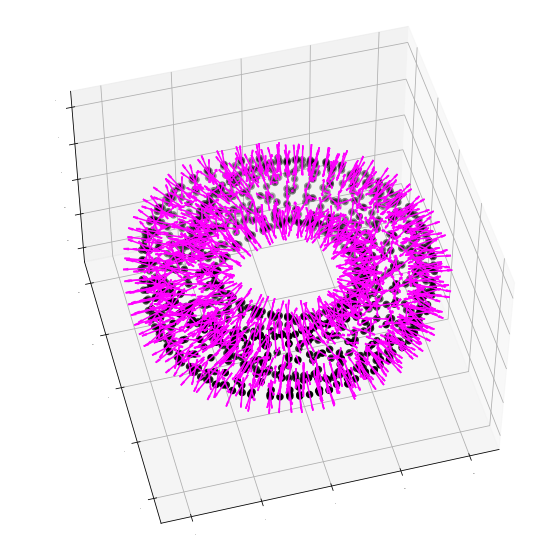

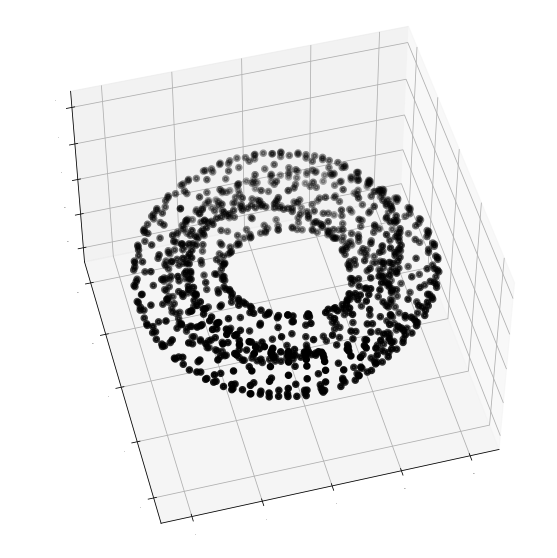

In [25]:
velour.PlotVectorField(X)  #vector field representation of X

velour.PlotPCA(X)          #representation of X via PCA 

We now compute the persistence of $X$. 
As there are not enough points, one does not read the homology of the Klein bottle (over $\mathbb{Z}/2\mathbb{Z}$): Betti numbers $(\beta_0,\beta_1,\beta_2) = (1,2,1)$.

Rips Complex is of dimension 3 - 7304219 simplices - 982 vertices. Filtration maximal value is 1.


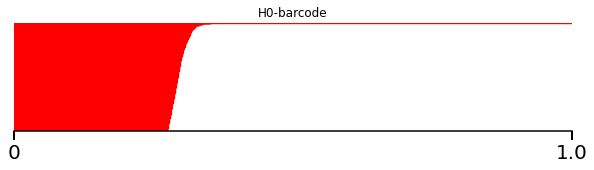

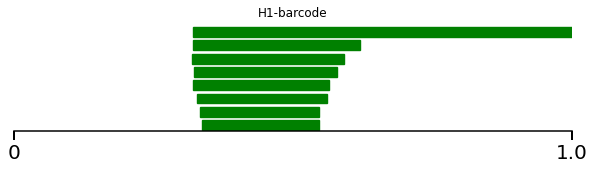

In [26]:
tmax = 1            #maximal filtration value for the Rips filtration and the persistence                                                   
dimension_max = 3   #maximal dimension to expand the Rips filtration

st = velour.RipsComplex(X, filtration_max = tmax, dimension_max = dimension_max)   #Rips filtration over X
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max, eps=0.2)           #persistence of the Rips filtration

We finally compute the lifebar of its persistent Stiefel-Whitney class. 

In [27]:
filtration_max = velour.BundleFiltrationMaximalValue(X, filtration = 'Rips')

Filtration maximal value is 0.4999999999999994.


Instead of computing the lifebar over the whole filtration, and running the risk of having to subdivide the complex (which is expensive), we compute the lifebar up to `filtration_max = 0.4` only.

The map satisfies the weak star condition.
Mapping Cone Complex is of dimension 5 - 21896 simplices - 990 vertices.


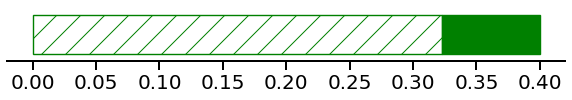

In [28]:
filtration_max = 0.4

Lifebar = velour.ComputeLifebar(st, X, filtration_max=filtration_max)   #computes the lifebar
velour.PlotLifebar(Lifebar, filtration_max)                             #plots the lifebar

The lifebar becomes solid from some point in the filtration. It means that the persistent Stiefel-Whitney class is nonzero from some point in the filtration.
This is consistent with the non-orientability of the normal bundle of the Klein bottle (its Stiefel-Whitney class is nonzero).

# Take-home message

This implementation depends on the parameter `gamma`, which controls the dilatation of the space $M(\mathbb{R}^n) \subset \mathbb{R}^n \times M(\mathbb{R}^n)$.
The other parameters are `tmax`, `dimension_max` and `filtration_max`. The value `filtration_max` must be chosen lower than `velour.FiltrationMaximalValue()`.

``` 
# X is a Nx(n+n^2) np.array, N = number of points, n+n^2 = dimension of the ambient space
gamma = 1

tmax = 1
dimension_max = 2
st = RipsComplex(X, filtration_max = tmax, dimension_max = dimension_max)

filtration_max = velour.BundleFiltrationMaximalValue(X, filtration = 'Rips')
Lifebar = velour.ComputeLifebar(st, X, filtration_max=filtration_max)
velour.PlotLifebar(Lifebar, filtration_max)                            
```
Sometimes, the algorithm may ask to subdivise the complex.
This can be performed with `velour.BarycentricSubdivisionSimplexTree()`.
```
# If subdivise again
st_sub, X_sub = velour.BarycentricSubdivisionSimplexTree(st, X)
velour.ComputeLifebar(st_sub, X_sub, filtration_max=filtration_max)
```